# Assignment 2
Avnish Tripathi 
22111014

In [1]:
#Importing Modules
import numpy as np
import math
import matplotlib.pyplot as plt 

## Question 1- 

# A) -
ALL the data is Collected Using the WiFI Analyzer app as stated in the Assignment.

# B) -
I have recorded RSSI Values For 6 Locations.
And in Each Location I have Recorded Values for 5 Orientation.

In [2]:
dist = [1,2,3,4,5,6]    # distance in m
log_dist = [math.log(i,10) for i in dist]  # taking LOG of Distances

In [3]:
Signal_strength1 = [-37,-34,-33,-41,-31]   # Signal Strength in dBM at distance 1 Meter
Signal_strength2 = [-59,-64,-57,-42,-55]   # Signal Strength in dBM at distance 2 Meter
Signal_strength3 = [-58,-67,-69,-73,-61]   # Signal Strength in dBM at distance 3 Meter
Signal_strength4 = [-73,-62,-68,-75,-76]   # Signal Strength in dBM at distance 4 Meter
Signal_strength5 = [-76,-79,-81,-83,-69]   # Signal Strength in dBM at distance 5 Meter
Signal_strength6 = [-85,-89,-93,-90,-84]   # Signal Strength in dBM at distance 6 Meter

list_Of_signal_strength = [Signal_strength1,Signal_strength2,Signal_strength3,Signal_strength4,Signal_strength5,Signal_strength6]

In [4]:
# Calculating Average Signal_stregth at Every Distance
Signal_DB = [sum(list_Of_signal_strength[i])/5 for i in range(len(dist))]
for i in range(len(dist)):
    print("The Average Signal_strength at distance",dist[i],"m is",Signal_DB[i],"dBm") # print the signal strength wrt to dist.

The Average Signal_strength at distance 1 m is -35.2 dBm
The Average Signal_strength at distance 2 m is -55.4 dBm
The Average Signal_strength at distance 3 m is -65.6 dBm
The Average Signal_strength at distance 4 m is -70.8 dBm
The Average Signal_strength at distance 5 m is -77.6 dBm
The Average Signal_strength at distance 6 m is -88.2 dBm


# c) -
Ploting all these points in a graph where the RSSI values are in y-axis (in dB or
dBm), and the distances are in x-axis (in log scale).

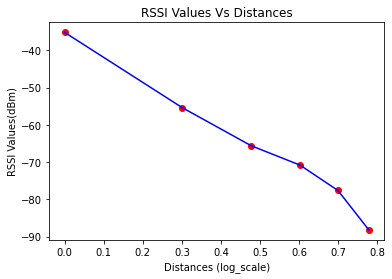

In [5]:
# Plotting the Graph

x = log_dist  # log of distances
y = Signal_DB  
plt.title('RSSI Values Vs Distances')
plt.ylabel('RSSI Values(dBm)')
plt.xlabel('Distances (log_scale)')
plt.plot(x, y, c ="blue")
plt.scatter(x,y,c = 'red')
plt.show()


# d ) -
Drawing a best fit straight line corresponding to this log-log plot i.e Signal_strength in dBm and log of Distances and Finding out the
slope of this line and then, dividing it by 10 and taking the absolute value, to Calculate path loss exponent.

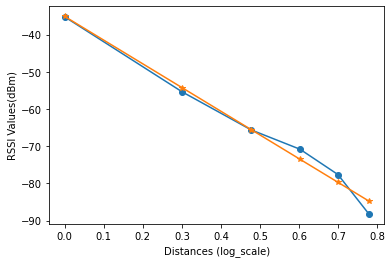

In [6]:
x = np.array(log_dist)  # Converting log_dist array to numpyarray and assigning to x
y = np.array(Signal_DB) # Converting Sigbal_DB array to numpyarray and assigning to y

m ,c = np.polyfit(x,y,1)   # Calculating Slope(m) and intercept(c) of the best-line striaght line

plt.ylabel('RSSI Values(dBm)')
plt.xlabel('Distances (log_scale)')
plt.plot(x, y, 'o-')
plt.plot(x, m*x + c, '*-')  


Here Orange Line is representing best fit line

In [7]:
Slope = m
n = Path_loss_exponent = abs(Slope / (10))  # Calculating Value of n
print("Path Loss Exponent (n) is",Path_loss_exponent)

Path Loss Exponent (n) is 6.379002927168651


# e) -
Finding out the variance of these RSSI samples, w.r.t. the best fit line.

In [8]:
Diff_Sq = []
for i in range(len(dist)): 
    y1 = m * log_dist[i] + c              # y calculated from the Equation of Best_fit line.
    Diff_Sq.append((y1-Signal_DB[i])**2) 


In [9]:
Variance = sum(Diff_Sq)/ len(Diff_Sq)
print("Variance WRT to Best-Fit_line is->",Variance)

Variance WRT to Best-Fit_line is-> 4.146172078299268


# Question 2 -

# a)-

d = 10 ** ( (Prd0[dBm] - Prd[dBm] + 10𝑛log10(𝑑0)) / (10*n) )  
The Above Formula is Calculated From -
𝑃𝑟[𝑑][𝑑𝐵m] = 𝑃𝑟(𝑑0)[𝑑𝐵𝑚] − 10𝑛log10(𝑑/𝑑0)

In [10]:
d0 = 1  # As told in the Question
Prd = -91  # Signal_Strength at Distance 7m is -91[DBM] which is Calculated from the App
d = 10 ** ((Signal_DB[0] - Prd + 10*n*math.log(d0,10))/(10*n))  #Signal_DB[0] is the Signal_strength at Distance 1m.
print("Distance Calculated from the Expression is",d,"m")
print("The diffrence in actual_dist and calculated_dist is",abs(d - 7),'m')

Distance Calculated from the Expression is 7.494537836163809 m
The diffrence in actual_dist and calculated_dist is 0.49453783616380864 m


# B) -
However, due to the noise there will be some errors in range/distance estimation. 
So, i have calculated the distance error by comparing Distance Calculated from Expression 
with the actual distance and then, I Repeated this experiment for 5 different distances and then, Calculated the
average error.

In [11]:
Actual_Distance = [2,3,4,5,6]
Distance_cal_from_Expression = []
for i in range(1,len(dist)):
    d = 10 ** ((Signal_DB[0] - Signal_DB[i] + 10*n*math.log(d0,10) )/(10*n))    #Signal_DB[i] Represent the Signal_strength at the (i+1) distance.
    Distance_cal_from_Expression.append(d)


In [12]:
error = []  # list to store error
for i in range(len(Actual_Distance)):
    error.append(abs(Actual_Distance[i]-Distance_cal_from_Expression[i]))  # error = abs(Actual_distance - Calculated_distance)

In [13]:
Average_Error = sum(error) / len(error)
print("The average_error is->",Average_Error,"m")

The average_error is-> 0.3232125790739902 m
